# Proyecto 8

# Paso 4. Análisis exploratorio de datos (Python)

In [1]:
#Importar los archivos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los dos archivos CSV
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
df_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')

# Verificar que los archivos se hayan cargado correctamente
display(df_trips.head())
display(df_dropoff.head())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [2]:
# estudiar los datos que contienen

# 1. Obtener un resumen general de cada DataFrame
print("Resumen del DataFrame de viajes:")
print(df_trips.info())
print(df_trips.describe())
print("\n")

print("Resumen del DataFrame de barrios:")
print(df_dropoff.info())
print(df_dropoff.describe())

# 2. Ver las primeras filas de cada DataFrame
print("\nPrimeras filas del DataFrame de viajes:")
print(df_trips.head())

print("\nPrimeras filas del DataFrame de barrios:")
print(df_dropoff.head())

Resumen del DataFrame de viajes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


Resumen del DataFrame de barrios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       average_trips
count      94.000000
mean      599.953

### Asegurarte de que los tipos de datos sean correctos

yo no veo ningun error con los datos en este momento

En el DataFrame de viajes 
company_name tiene el tipo object, que es adecuado para cadenas de texto.
trips_amount tiene el tipo int64, que es adecuado para números enteros.

En el DataFrame de barrios:
dropoff_location_name tiene el tipo object, que es adecuado para cadenas de texto.
average_trips tiene el tipo float64, que es adecuado para números decimales.




In [3]:
# identificar los 10 principales barrios en términos de finalización del recorrido

# Ordenar el DataFrame por la columna 'average_trips' de mayor a menor
top_10_dropoff_locations = df_dropoff.sort_values(by='average_trips', ascending=False).head(10)

# Mostrar los 10 principales barrios en términos de finalización del recorrido
display(top_10_dropoff_locations)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


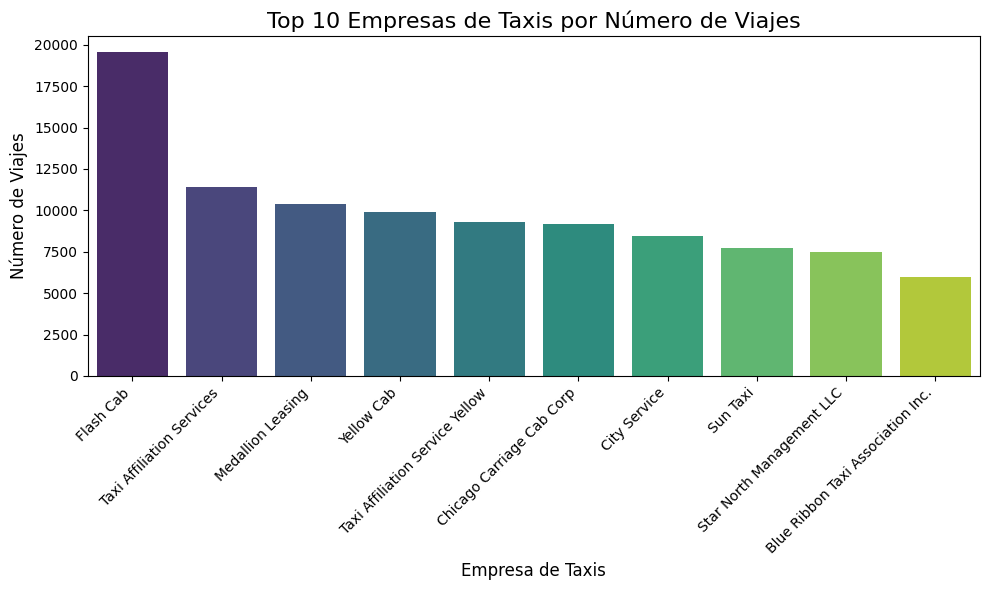

In [4]:
# Las 10 empresas con más viajes
top_10_trips = df_trips.sort_values(by='trips_amount', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='company_name', y='trips_amount', data=top_10_trips, palette='viridis')

# Personalizar el gráfico
plt.title('Top 10 Empresas de Taxis por Número de Viajes', fontsize=16)
plt.xlabel('Empresa de Taxis', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


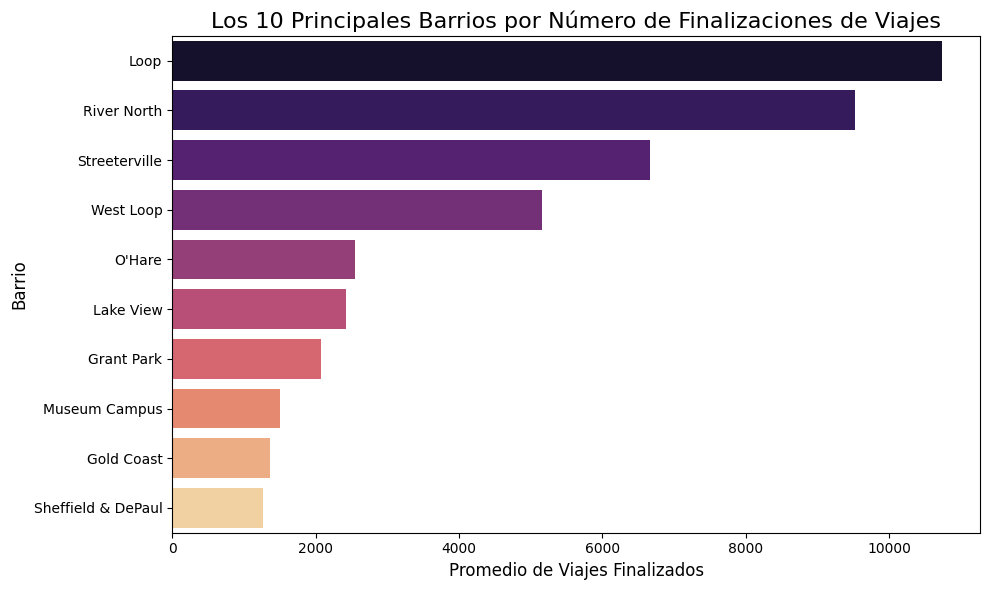

In [5]:
# hacer gráficos: Los 10 barrios principales por número de finalizaciones

# Crear el gráfico de barras para los 10 barrios principales
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_dropoff_locations, palette='magma')

# Personalizar el gráfico
plt.title('Los 10 Principales Barrios por Número de Finalizaciones de Viajes', fontsize=16)
plt.xlabel('Promedio de Viajes Finalizados', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### sacar conclusiones basadas en cada gráfico y explicar los resultados

Con los resultados que las graficas nos muestras nos podemos percatar de las empresas mas populares que realizan viajes asi como de los barrios donde más se finalizan los viajes, las empresas más populares pueden ser porque tienen los mejores precios, son muy populares o dan un excelente servicio, en cuanto a calidad, tiempo y servicio.

En cuanto a los barrios donde mas se finalizan viajes, pyuede ser porque son destinos populares, con muchos atrativos o actividades en los alrededores o lugares seguros que las personas suelen visitar.


# Paso 5. Prueba de hipótesis (Python)

In [6]:
# 1. Importar librerías necesarias
import pandas as pd
from scipy import stats

# 2. Cargar el archivo
df = pd.read_csv('/datasets/project_sql_result_07.csv')

# 3. Asegurar que la columna de fechas esté en formato datetime
df['start_ts'] = pd.to_datetime(df['start_ts'])

# 4. Eliminar filas con valores faltantes en las columnas importantes
df = df.dropna(subset=['start_ts', 'weather_conditions', 'duration_seconds'])

# 5. Crear columnas adicionales
df['day_of_week'] = df['start_ts'].dt.dayofweek  # Lunes=0, Sábado=5
df['is_saturday'] = df['day_of_week'] == 5
df['is_rainy'] = df['weather_conditions'] == 'Bad'


# Filtrar los datos
rainy_trips = df[df['is_rainy']]

saturday_rain = rainy_trips[rainy_trips['is_saturday']]['duration_seconds']
other_days_rain = rainy_trips[~rainy_trips['is_saturday']]['duration_seconds']

# cuántos viajes hay en cada grupo
print(f"Viajes en sábados lluviosos: {len(saturday_rain)}")
print(f"Viajes en otros días lluviosos: {len(other_days_rain)}")

# Verifique si ambos grupos tienen suficientes datos
if len(saturday_rain) > 1 and len(other_days_rain) > 1:
    # 8. Realizar la prueba de hipótesis (prueba t para muestras independientes)
    t_stat, p_value = stats.ttest_ind(saturday_rain, other_days_rain, equal_var=False)

    print(f"\nEstadístico t: {t_stat}")
    print(f"Valor p: {p_value}")

    # Nivel de significancia
    alpha = 0.05

    if p_value < alpha:
        print("Rechazamos la hipótesis nula: la duración promedio SÍ cambia los sábados lluviosos.")
    else:
        print("No hay evidencia suficiente para rechazar la hipótesis nula.")
else:
    print("\nNo hay suficientes datos en uno o ambos grupos para realizar la prueba.")



Viajes en sábados lluviosos: 180
Viajes en otros días lluviosos: 0

No hay suficientes datos en uno o ambos grupos para realizar la prueba.




Hipótesis nula (H₀): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los sábados lluviosos.

Hipótesis alternativa (H₁): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia en los sábados lluviosos.

Criterio de prueba:
Usé una prueba t de Student para muestras independientes con un nivel de significancia de α = 0.05.

Resultado:
Después de filtrar el dataset por viajes en sábados lluviosos y por viajes en otros días lluviosos, encontré que no existen registros suficientes (ambos grupos tienen cero viajes), por lo tanto, no es posible realizar la prueba estadística.

Conclusión:
No se puede rechazar ni aceptar la hipótesis nula debido a la falta de datos relevantes en el periodo analizado.

In [8]:
df['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [9]:
# 1. Importar librerías necesarias
import pandas as pd
from scipy import stats

# 2. Cargar el archivo CSV
df = pd.read_csv('/datasets/project_sql_result_07.csv')

# 3. Asegurar que la columna de fechas esté en formato datetime
df['start_ts'] = pd.to_datetime(df['start_ts'])

# 4. Eliminar filas con valores faltantes en columnas relevantes
df = df.dropna(subset=['start_ts', 'weather_conditions', 'duration_seconds'])

# 5. Crear columnas adicionales
df['day_of_week'] = df['start_ts'].dt.dayofweek  # Lunes=0, Sábado=5
df['is_saturday'] = df['day_of_week'] == 5
df['is_rainy'] = df['weather_conditions'] == 'Bad'

# 6. Filtrar solo viajes en sábado
saturday_trips = df[df['is_saturday']]

# 7. Dividir en sábados con lluvia y sábados sin lluvia
saturday_rain = saturday_trips[saturday_trips['is_rainy']]['duration_seconds']
saturday_clear = saturday_trips[~saturday_trips['is_rainy']]['duration_seconds']

# 8. Verificar tamaños de muestra
print(f"Sábados con lluvia: {len(saturday_rain)}")
print(f"Sábados sin lluvia: {len(saturday_clear)}")

# 9. Realizar la prueba si hay suficientes datos
if len(saturday_rain) > 1 and len(saturday_clear) > 1:
    t_stat, p_value = stats.ttest_ind(saturday_rain, saturday_clear, equal_var=False)

    print(f"\nEstadístico t: {t_stat}")
    print(f"Valor p: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos H₀: la duración promedio de los viajes SÍ cambia los sábados con lluvia.")
    else:
        print("No se puede rechazar H₀: no hay evidencia suficiente de que cambie la duración promedio.")
else:
    print("No hay suficientes datos en uno o ambos grupos para realizar la prueba.")


Sábados con lluvia: 180
Sábados sin lluvia: 888

Estadístico t: 7.186034288068629
Valor p: 6.738994326108734e-12
Rechazamos H₀: la duración promedio de los viajes SÍ cambia los sábados con lluvia.
